# "California Housing" Supervised Learning -Regression Evaluation

***Import Libraries***

In [75]:
import warnings #Used to manage warning messages in Python
import sys #Provides access to system-specific parameters and functions
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd #A powerful library for data manipulation and analysis
import numpy as np #Focused on numerical computations. It provides support for arrays, matrices, and mathematical functions
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations like line plots, bar graphs, histograms, etc.
import seaborn as sns #this library simplifies creating visually appealing and informative statistical graphics such as heatmaps and pair plots
from scipy.stats import skew # tools for statistical computations such as calculating skewness, probability distributions, and hypothesis testing.
from sklearn.preprocessing import StandardScaler #Used for feature scaling in machine learning.
from sklearn.model_selection import train_test_split #Splits datasets into training and testing subsets
from sklearn.linear_model import LinearRegression #Implements a simple and commonly used linear regression algorithm for predicting continuous outcomes.
from sklearn.tree import DecisionTreeRegressor # decision tree regression model that splits the data into regions to make 
                                               #predictions based on tree-like structures.
from sklearn.ensemble import RandomForestRegressor  # A powerful regression model that uses collection of decision trees to improve predictions 
from sklearn.ensemble import GradientBoostingRegressor # method that builds models iteratively to correct the errors of its predecessors 
                                                        #for achieving high accuracy
from sklearn.svm import SVR # Implements Support Vector Regression, a technique that aims to fit the best possible hyperplane for predicting 
                            #continuous values
# mean_squared_error- evaluate the quality of predictions made by regression model
#mean_absolute_error -It measures the average magnitude of errors between the predicted and actual values
# r2-score--It measures the proportion of the variance in the dependent variable (𝑦) that is predictable from the independent variables (𝑋)
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
                                                  

# ***1.	Loading and Preprocessing*** 

***Loading and Preprocessing--
Load the California Housing dataset using the fetch_california_housing function from sklearn***

In [78]:
from sklearn.datasets import fetch_california_housing
# Load the California Housing dataset and stored in California_house_price
california_house_price = fetch_california_housing()


***Convert the dataset into a pandas DataFrame for easier handling***

In [81]:
# creates a Pandas DataFrame from a dataset loaded using Scikit-learn
df = pd.DataFrame(california_house_price.data, columns=california_house_price.feature_names)

# Add the target column (house prices)
df['house_price'] = california_house_price.target

print(df.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [83]:
df.head(n=5)#will display the first 5 rows of your DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [85]:
# summary of the DataFrame, including the number of non-null entries per column and data types
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [87]:
# information about the dimensions of the DataFrame, specifically the number of rows and columns.
df.shape

(20640, 9)

In [89]:
#to print the column names & their order
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')


In [91]:
#to print the number of missing (NaN) values in each column of the DataFrame
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
house_price    0
dtype: int64


In [93]:
# used to count the numberer times zero appears in each column
zero_counts = (df == 0).sum()
print("Count of 0 values in each column:")
print(zero_counts)

Count of 0 values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
house_price    0
dtype: int64


In [95]:
# Save a copy of the original file
df.to_csv("california_house.csv", index=False)

***Check the duplicate records***

In [98]:
# to check the number of duplicate rows in the Dataframe
duplicates_count = df.duplicated().sum()

# Print the count of duplicate records
if duplicates_count > 0:
    print(f"\nNumber of duplicate records: {duplicates_count}\n")
else:
    print("Number of  duplicate records found.")
    
# Check for duplicates
duplicates = df[df.duplicated()]
# Print duplicates with header and all data
if not duplicates.empty:
    print(duplicates.to_string(index=False))
else:
    print("No duplicate records found.")


Number of  duplicate records found.
No duplicate records found.


***Boxplot to identify the outliers***

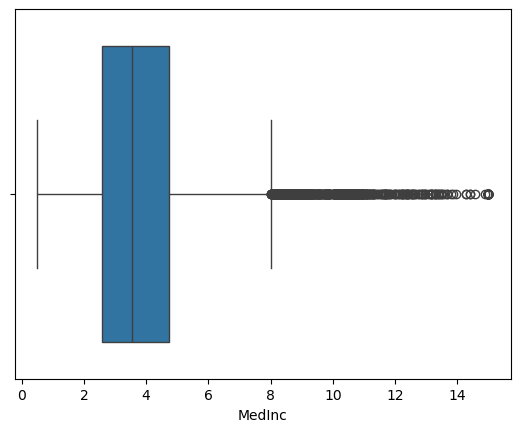

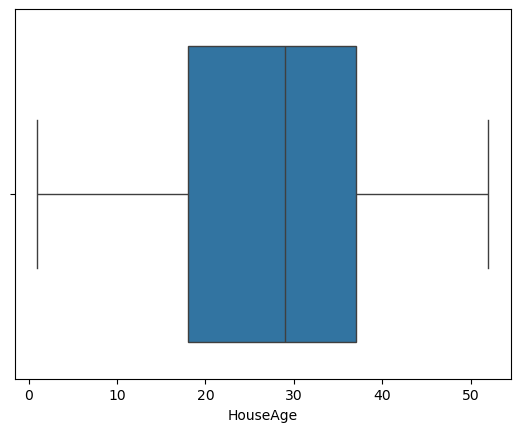

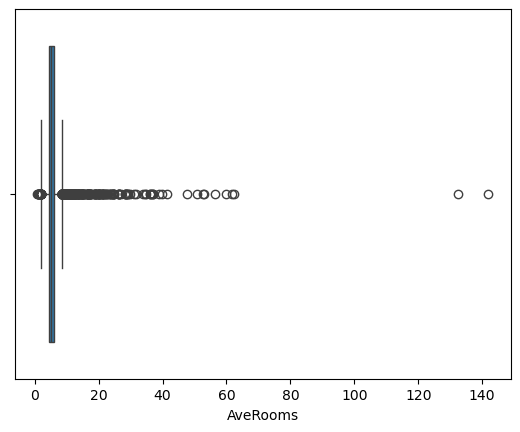

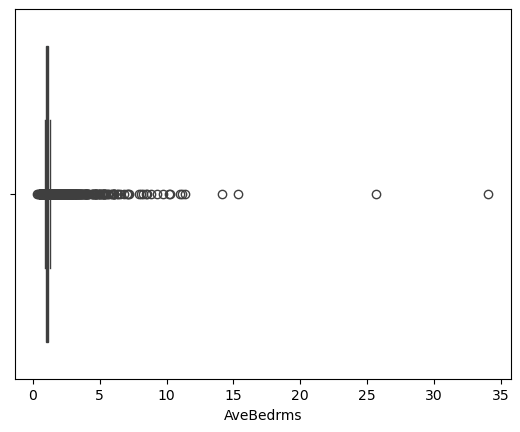

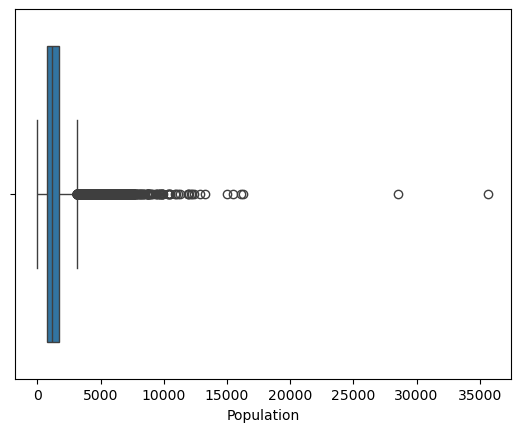

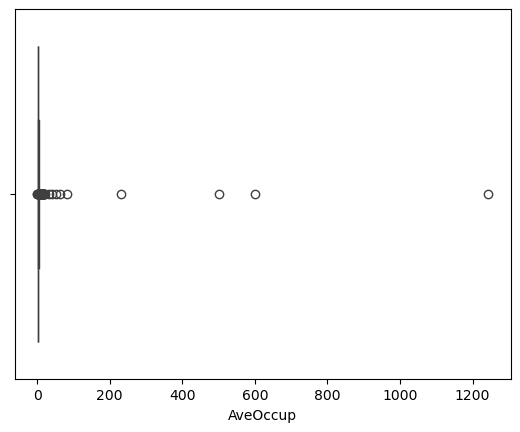

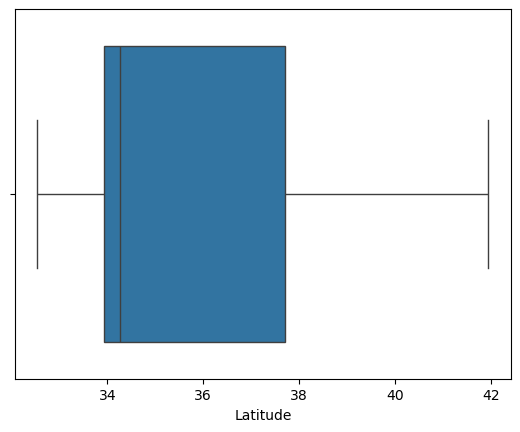

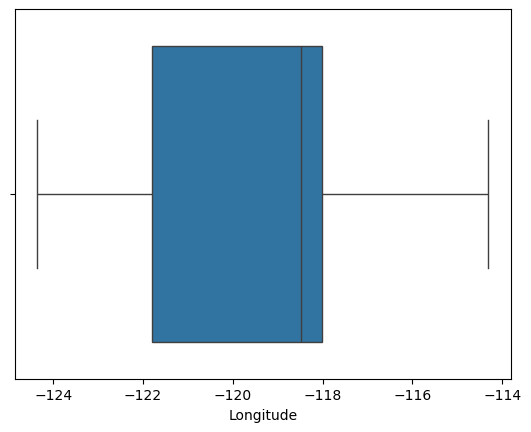

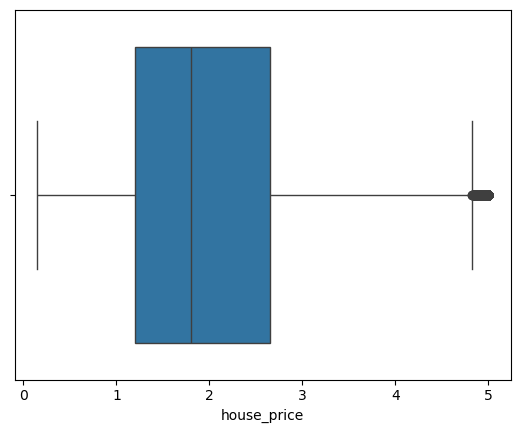

In [101]:
#BoxPlot to identify Outliers

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

***Find the skewness of each columns***

In [103]:
# is used to calculate the skewness of each column in the DataFrame
skew_values = skew(df, axis=0, bias=True)

# Print skewness with column names
print("\nSkewness of each column:")
for col, skew_val in zip(df.columns, skew_values): #zip() function pairs each column name with its corresponding skewness value.
    print(f"{col}: {skew_val:.4f}")  # Format to 4 decimal places


Skewness of each column:
MedInc: 1.6465
HouseAge: 0.0603
AveRooms: 20.6964
AveBedrms: 31.3147
Population: 4.9355
AveOccup: 97.6325
Latitude: 0.4659
Longitude: -0.2978
house_price: 0.9777


***based on the skewness identify which is right skewed and which is left skewed if there is any symmetrical***                                                                                                                                                                                                                                                                                                                         

 ***Skewness >               1.0 →              Highly skewed (right-tailed, large outliers).***  
 ***Skewness between      -1 and 1 →            Roughly normal (acceptable for models).***  
 ***Skewness <             -1.0 →               Highly left-skewed (rare in real estate data).***
    
    
    
    
    
    MedInc (Median Income)            	 1.6465          	  Moderately right-skewed  

    HouseAge (Median House Age)     	 0.0603	              Nearly symmetrical  

    AveRooms (Avg. Rooms per Household)	 20.6963	          Highly right-skewed (outliers present)


    AveBedrms (Avg. Bedrooms per Household)	  31.3147         Extremely right-skewed (outliers present)
    Population                      	4.9355                Highly right-skewed
    
    AveOccup (Avg. Occupants per Household)	97.6324	          Extremely right-skewed (severe outliers)
    
    Latitude	                        0.4659	              Slightly right-skewed
    
    Longitude	                        -0.2977	              Slightly left-skewed
    
    Target (House Price in $100,000s)	0.9776	              Moderately right-skewed

***IQR Outlier Removal***

In [110]:
# Apply IQR Outlier Removal
for i in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.5 * IQR  # Mild outlier removal
    upper_bound = Q3 + 0.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

# Compute skewness after outlier removal
skew_values_after = df.apply(skew, axis=0, bias=True)

# Print skewness values
print("\nSkewness after Outlier Removal (IQR method):")
for col, skew_val in skew_values_after.items():
    print(f"{col}: {skew_val:.4f}")


Skewness after Outlier Removal (IQR method):
MedInc: 0.1330
HouseAge: -0.2046
AveRooms: -0.1855
AveBedrms: 0.1675
Population: 0.3531
AveOccup: 0.1028
Latitude: 0.3122
Longitude: -0.3340
house_price: 0.0478


    MedInc       0.1330	 Good 
    HouseAge	-0.2046	 Good	
    AveRooms	-0.1855	 Good	
    AveBedrms	0.1675	 Perfectly Normal	
    Population	0.3531	 Acceptable	
    AveOccup	0.1028	 Perfectly 
    Latitude	0.3122	 Good	
    Longitude	-0.3340	 Good	
    House Price (Target)	0.0478	 Good

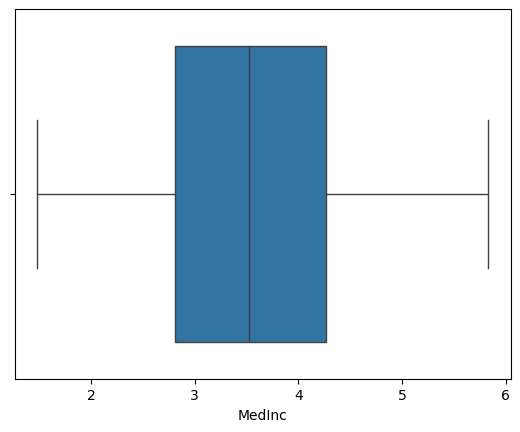

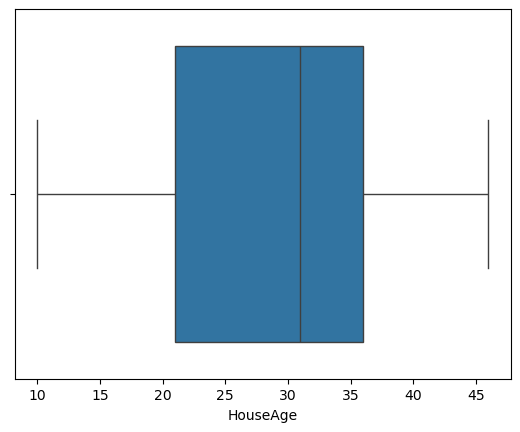

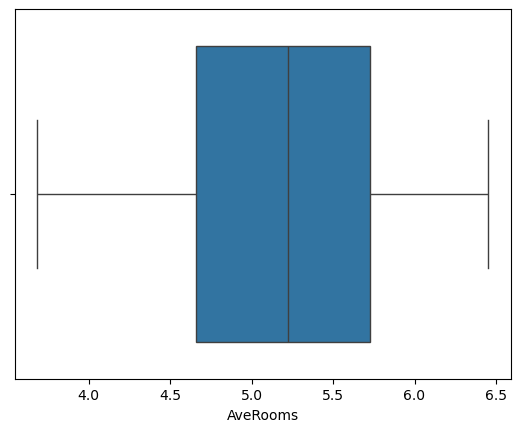

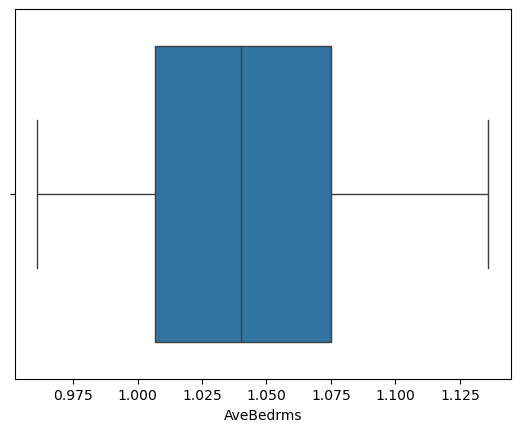

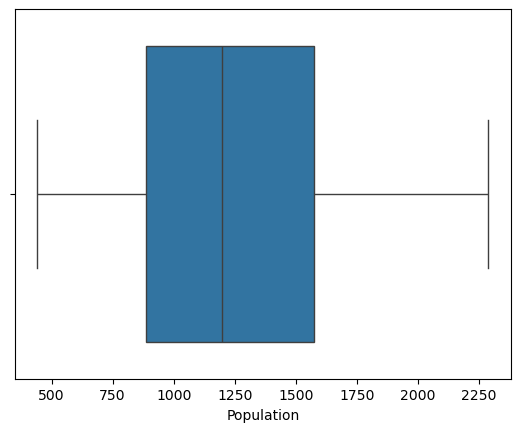

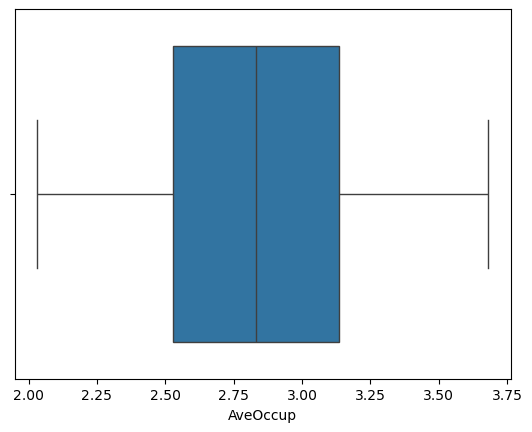

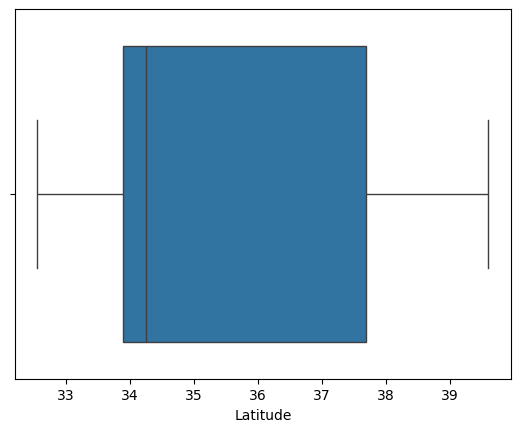

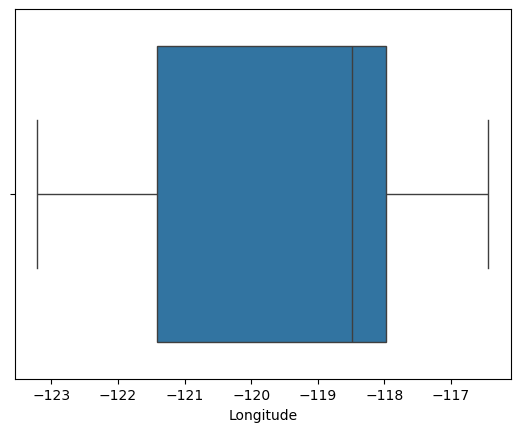

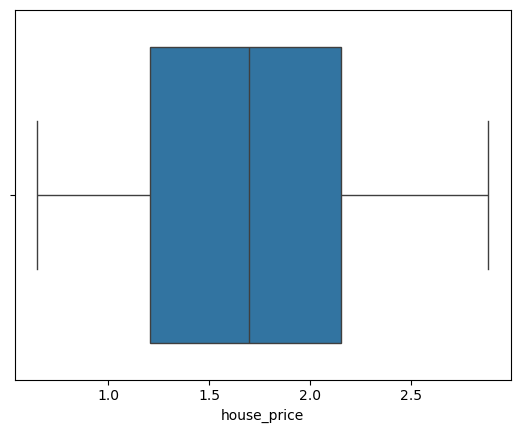

In [113]:
#BoxPlot to identify Outliers

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

# Feature Scaling

In [116]:
# Define features (X) and target (y)
X = df.drop(columns=['house_price'])  # Features
y = df['house_price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Check transformed data
print("\nX_train_scaled (first 5 rows):\n", X_train_scaled[:5])
print("\nX_test_scaled (first 5 rows):\n", X_test_scaled[:5])



X_train_scaled (first 5 rows):
 [[ 0.33621195 -1.17893135  0.2574451   1.07954456  0.09100798  1.39732814
  -0.83184875  0.84020006]
 [-1.5481977   0.49769789 -0.34672166  0.53905598 -1.16574721 -1.87497022
  -1.35669603  1.27811463]
 [-0.41210257 -1.49329933 -0.76018702  0.29309276 -0.12143285 -1.22427662
   0.60176188 -0.13059849]
 [-0.83008924  0.18332991 -0.69531223  1.64673288  0.91840908  1.6990572
  -0.73465481  0.92989341]
 [ 0.58071783  1.23122318 -0.35233964  0.38230222 -0.46133816 -1.39948422
   1.02941522 -1.53931161]]

X_test_scaled (first 5 rows):
 [[ 0.23906271 -0.2358274  -0.59889487 -0.17944334  1.00785784  0.16347889
  -0.65203996  0.48142668]
 [-0.03850657  0.39290856 -0.4165399  -0.71674222  1.19122782 -0.39861208
  -1.37127512  1.26756247]
 [ 1.01656282 -0.86456337  1.0516909   0.09178458  0.17598431  0.19392856
  -0.63746086  0.53418748]
 [-2.06670119 -0.2358274  -0.76850409  0.56797741 -0.87727493 -1.95138284
  -0.7443742   1.27811463]
 [ 1.53720931  0.9168552  

# 2. Implement regression algorithms

In [134]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),# ensure reproducibility
    "Support Vector Regressor": SVR()
}

results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train on scaled data
    y_pred = model.predict(X_test_scaled)  # Predict on scaled test data
    
    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print results
print("\n📊 Model Evaluation Results:\n")
for name, metrics in results.items():
    print(f"\n{name}:\n")
    print(f"🔹 Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
    print(f"🔹 R² Score: {metrics['R2']:.4f}")

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)


📊 Model Evaluation Results:


Linear Regression:

🔹 Mean Squared Error (MSE): 0.1523
🔹 Mean Absolute Error (MAE): 0.3120
🔹 R² Score: 0.5147

Decision Tree Regressor:

🔹 Mean Squared Error (MSE): 0.1670
🔹 Mean Absolute Error (MAE): 0.2971
🔹 R² Score: 0.4679

Random Forest Regressor:

🔹 Mean Squared Error (MSE): 0.0832
🔹 Mean Absolute Error (MAE): 0.2160
🔹 R² Score: 0.7348

Gradient Boosting Regressor:

🔹 Mean Squared Error (MSE): 0.0897
🔹 Mean Absolute Error (MAE): 0.2334
🔹 R² Score: 0.7140

Support Vector Regressor:

🔹 Mean Squared Error (MSE): 0.1222
🔹 Mean Absolute Error (MAE): 0.2650
🔹 R² Score: 0.6107
                                  MSE       MAE        R2
Linear Regression            0.152303  0.311968  0.514656
Decision Tree Regressor      0.166989  0.297121  0.467859
Random Forest Regressor      0.083229  0.216017  0.734776
Gradient Boosting Regressor  0.089734  0.233413  0.714046
Support Vector Regressor     0.122161  0.265030  0.610711


***1. Linear Regression***

•	Linear Regression assumes a linear relationship between the independent variables (features) and the dependent variable (house price).  
•	Simple and interpretable.  
•	Efficient for large datasets with many observations.  
•	Provides clear insights into the effect of each feature.  
•	Sensitive to outliers in the dataset.  

•	Suitable if the  house prices are linearly related to features However, this is often not the case in real estate data.  
•	
***2. Decision Tree Regressor*** 
•	Decision Trees model data by splitting it into subsets based on feature values.  
•	It can capture non-linear relationships and interactions between features.  
•	Handles non-linear relationships effectively.  
•	Works well with small to medium-sized datasets.  
•	Easy to interpret as it produces a tree-like structure.  
•	Prone to overfitting, especially with deep trees.  
•	Sensitivity to small changes in the data (can be unstable).  

•	Suitable when we want to capture non-linear relationships and interactions between features. Decision Trees can identify important features that contribute to house prices.

***3. Random Forest Regressor***  
•	An ensemble method that builds multiple decision trees and averages their predictions  
•	Reduces overfitting by averaging the results of many trees.  
•	Handles non-linear relationships effectively.  
•	Reduces overfitting through bootstrapping (sampling with replacement) and random feature selection.  
•	Works well with large datasets and high-dimensional data.  
•	More complex to tune compared to a single decision tree.  
•	Can be computationally expensive for very large datasets.  

•	Suitable when we want to reduce overfitting and improve the robustness of predictions. Random Forest can handle interactions between features well, which are common in house pricing data.    


***4. Gradient Boosting Regresso***  
•	Builds trees sequentially, where each tree corrects the errors of previous ones.  
•	Very powerful for regression tasks.   
•	Highly effective for capturing complex patterns in data.  
•	Handles non-linear relationships and interactions well.  
•	Tunable to avoid overfitting through hyperparameter tuning.  
•	More computationally intensive than simpler models.  
•	Requires careful tuning of parameters to avoid overfitting.  

•	Gradient Boosting is very effective in this dataset due to its ability to handle complex patterns and interactions.  
•	Handles non-linear relationships and interactions well, which are common in real estate data.  

***5. Support Vector Regressor (SVR)***   
•	A type of support vector machine that can be used for regression tasks.  
•	Finds the optimal hyperplane to fit the data using kernel functions.  
•	Can handle non-linear relationships using kernel functions.  
•	Effective in high-dimensional spaces and small datasets.  
•	Sensitive to outliers due to its use of hinge loss.  
•	Computationally intensive, especially with large datasets and complex kernels.  

•	Suitable when we have a small dataset or need to handle non-linear relationships. SVR can be effective if the relationship is not strictly linear but can be captured using a kernel.  
•	Handles interactions between features well, which are common in house pricing data. 

***For the California Housing Dataset, Gradient Boosting Regressor is a strong choice due to its ability to capture complex interactions and patterns effectively***  


In [121]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T #T is used to transpose the DataFrame, swapping rows with column
print(results_df)

                                  MSE       MAE        R2
Linear Regression            0.152303  0.311968  0.514656
Decision Tree Regressor      0.166989  0.297121  0.467859
Random Forest Regressor      0.083229  0.216017  0.734776
Gradient Boosting Regressor  0.089734  0.233413  0.714046
Support Vector Regressor     0.122161  0.265030  0.610711


***Random Forest Regressor has the lowest MSE (0.083229) and MAE (0.216017), and the highest R² (0.734776). This indicates that Random Forest is capturing the variability in housing prices the best, making it the top-performing model.***

***On the other hand, Decision Tree Regressor shows the highest MSE (0.166989), the lowest R² (0.467859), and its MAE is also relatively higher compared to some models. This suggests that while Decision Trees are good at capturing non-linear relationships, on its own it may overfit or fail to generalize as well as the ensemble methods in this scenario.***


In [125]:
worst_model = min(results, key=lambda x: results[x]['R2'])
print(f"Worst-performing model: {worst_model}")

Worst-performing model: Decision Tree Regressor


In [127]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"Best-performing model: {best_model}")

Best-performing model: Random Forest Regressor
